In [171]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [172]:
df = pd.read_csv("data.csv")
# To display the top 5 rows 
df.head(5) 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [173]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Dropping irrelevant columns ###

In [176]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Driven_Wheels      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


### Renaming the columns ###

In [179]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


### Dropping the duplicate rows ###

In [181]:
df.shape

(11914, 10)

In [182]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [183]:
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [184]:
df = df.drop_duplicates()

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [185]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

### Dropping the missing or null values ###

In [187]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [188]:
print(df.isna().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [189]:
df = df.dropna()

In [190]:
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [191]:
print(df.isnull().sum())   # After dropping the values

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


### Detecting Outliers ###

In [193]:
df.describe()

,Year,HP,Cylinders,MPG-H,MPG-C,Price
count,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,1.082700e+04
mean,2010.896370,254.553062,5.691604,26.308119,19.327607,4.249325e+04
std,7.029534,109.841537,1.768551,7.504652,6.643567,6.229451e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,2.197250e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.084500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


21327.5


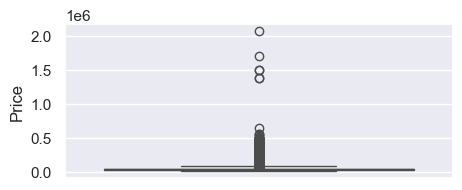

In [194]:
print(df['Price'].quantile(0.75) - df['Price'].quantile(0.25))
plt.figure(figsize=(5,2))
sns.boxplot(df['Price']);

In [195]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'Price' column
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

2.0


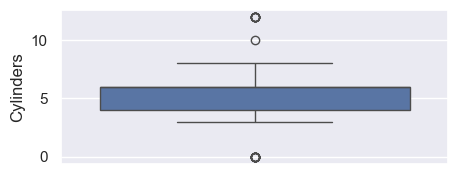

In [196]:
print(df['Cylinders'].quantile(0.75) - df['Cylinders'].quantile(0.25))
plt.figure(figsize=(5,2))
sns.boxplot(df['Cylinders']);

In [197]:
Q1 = df['Cylinders'].quantile(0.25)
Q3 = df['Cylinders'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'Cylinders' column
df = df[(df['Cylinders'] >= lower_bound) & (df['Cylinders'] <= upper_bound)]

118.0


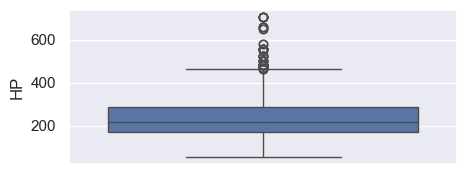

In [198]:
print(df['HP'].quantile(0.75) - df['HP'].quantile(0.25))
plt.figure(figsize=(5,2))
sns.boxplot(df['HP']);

In [199]:
Q1 = df['HP'].quantile(0.25)
Q3 = df['HP'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'HP' column
df = df[(df['HP'] >= lower_bound) & (df['HP'] <= upper_bound)]

In [224]:
df.shape

(9811, 10)

### Plot different features against one another (scatter), against frequency (histogram) ###

#### Histogram ####

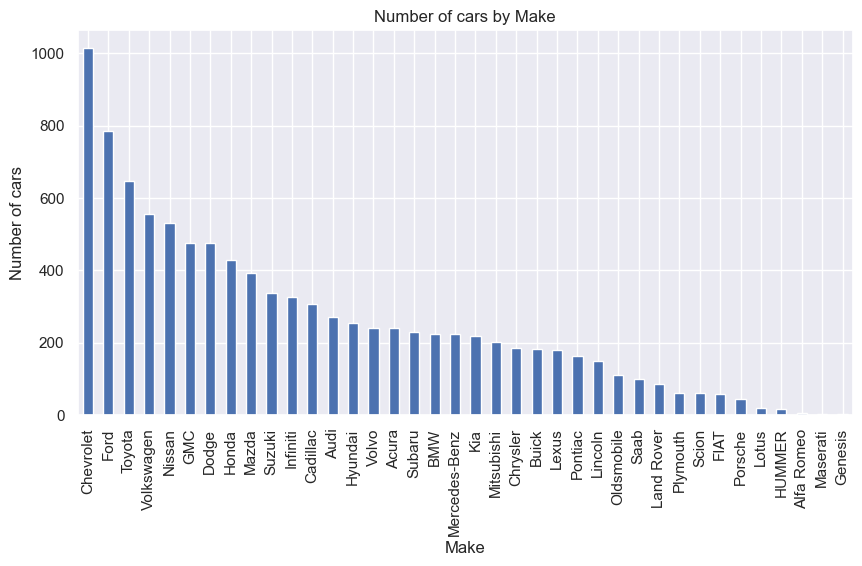

In [229]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by Make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

#### Heat Map ####

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.355282,-0.120465,0.327440,0.305079,0.652002
HP,0.355282,1.000000,0.705349,-0.394289,-0.501402,0.737966
Cylinders,-0.120465,0.705349,1.000000,-0.618694,-0.676017,0.324350
MPG-H,0.327440,-0.394289,-0.618694,1.000000,0.808591,-0.056257
MPG-C,0.305079,-0.501402,-0.676017,0.808591,1.000000,-0.122607
Price,0.652002,0.737966,0.324350,-0.056257,-0.122607,1.000000


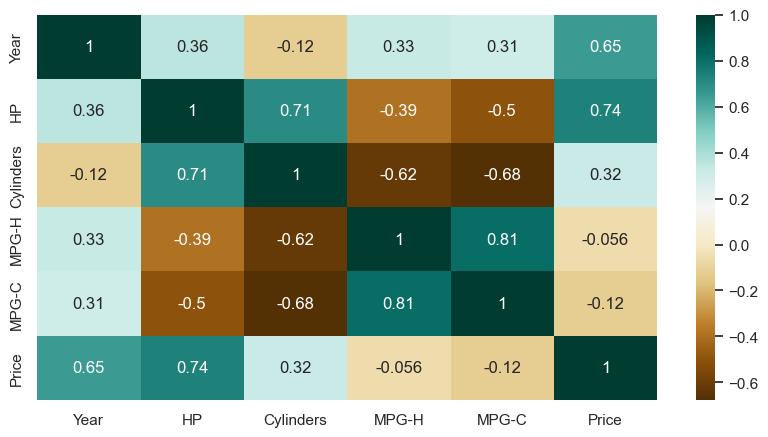

In [233]:
plt.figure(figsize=(10,5))
c= df.corr(numeric_only=True)
sns.heatmap(c,cmap="BrBG",annot=True)
c

#### Scatterplot ####

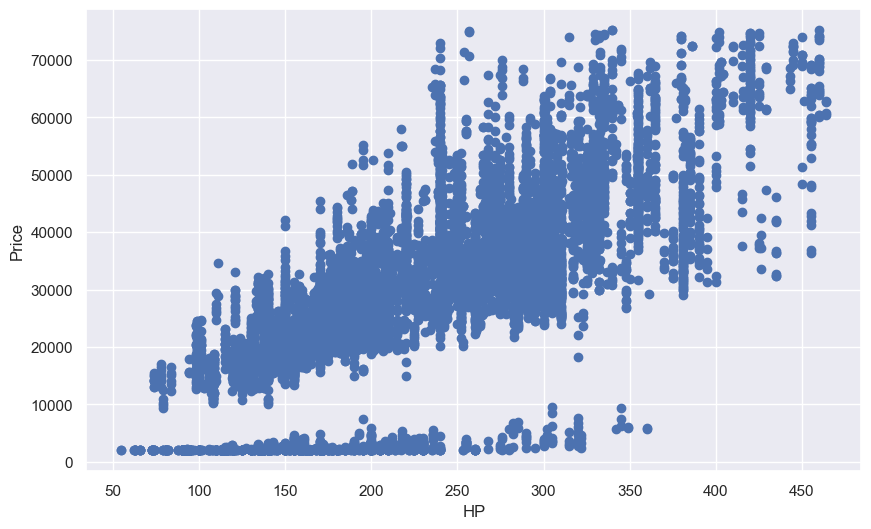

In [235]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()